# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import tree



# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set).

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [ ]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def train_pred_logistic_regression(X_train, Y_train, X_test, kernel='linear', reg_param=0., 
                                   kernel_param=1., num_iter_gd=100):
"""
Arguments:
X_train : (n,d) shape numpy array
Y_train : (n,)  shape numpy array
X_test : (m,d) shape numpy array
kernel = 'linear' or 'rbf' or 'poly' 
reg_param = $\lambda$

Returns the prediction of logistic regression :
$ \min \sum_{i=1}^n \log(1+\exp(-y_i* \w^\top \phi(\x_i)))  + \frac{\lambda}{2} ||\w||^2 $
where $\phi$ is the feature got by the kernel.

The kernel is defined by the kernel_param:
If kernel=linear: K(\u,\v) = \u^\top \v  
If kernel=poly:  K(\u,\v) = (1+\u^\top \v)^(kernel_param)
If kernel=rbf:  K(\u,\v) = \exp(-kernel_param*||\u-\v||^2)

Returns:
Y_test_pred: (m,) shape numpy array

"""
    
    
def return_best_hyperparam( ): # give appropriate arguments, return appropriate variables
    



In [ ]:
# CodeWrite : Use the functions above to get the numbers you report below. 



TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  




In [ ]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6



# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the via using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set (dataset A,B,C,D) report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [40]:
# CodeWrite cell
# Write SVM classifier using SKlearn, write code for choosing best hyper parameters.
# write only functions here

def k_foldCV(model, X_train, Y_train, k_splits):
    avg_vald_accur = 0.0
    split_size = int(X_train.shape[0]/k_splits)
    
    for i in range(k_splits):
        train_index = np.ones(X_train.shape[0], dtype=bool)
        #indides = True used for CV_training, indices=false used for CV_validation
        #[F F F T T T..T], [T T T F F F T T...T],......so on
        train_index[i*split_size:(i*split_size + split_size)] = False
        x_train_cv, y_train_cv = X_train[train_index == True,:], Y_train[train_index == True]
        x_valid_cv, y_valid_cv = X_train[train_index == False,:], Y_train[train_index== False]
        
        model.fit(x_train_cv, y_train_cv)
        avg_vald_accur = model.score(x_valid_cv, y_valid_cv)
    
    return avg_vald_accur/k_splits

def gridSearch_rbf(X_train, Y_train):
    best_C = None
    best_gamma = None
    best_vald_acc = np.infty*-1
    
    C_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
    gamma_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
    
    for C in C_range:
        for gamma in gamma_range:
            clf_svc = SVC(C=C, kernel='rbf', gamma=gamma, verbose=False)
            vald_acc = k_foldCV(clf_svc,X_train,Y_train, 10)
            if vald_acc > best_vald_acc:
                best_vald_acc = vald_acc
                best_C = C
                best_gamma = gamma
    
    return best_C, best_gamma, best_vald_acc

def gridSearch_poly(X_train, Y_train):
    

In [50]:
# CodeWrite cell
# Write code here for generating the numbers that you report below.

datasets = ['dataset_A.npz', 'dataset_B.npz']

for s in datasets:
    data = np.load('Archive2/' + s)
    X_train = data['arr_0.npy']
    Y_train = data['arr_1.npy']t

    print('========= ' + s + '============')
    C, gamma, best_vald_acc = gridSearch_rbf(X_train,Y_train)
    print('kernel = rbf',' C = ', C, ' gamma= ', gamma)
    
    


# ---------------------------------------------------------------

# ------------------------


========= dataset_A.npz============
kernel = rbf  C =  0.1  gamma=  10.0
========= dataset_B.npz============
kernel = rbf  C =  0.1  gamma=  1.0


TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  


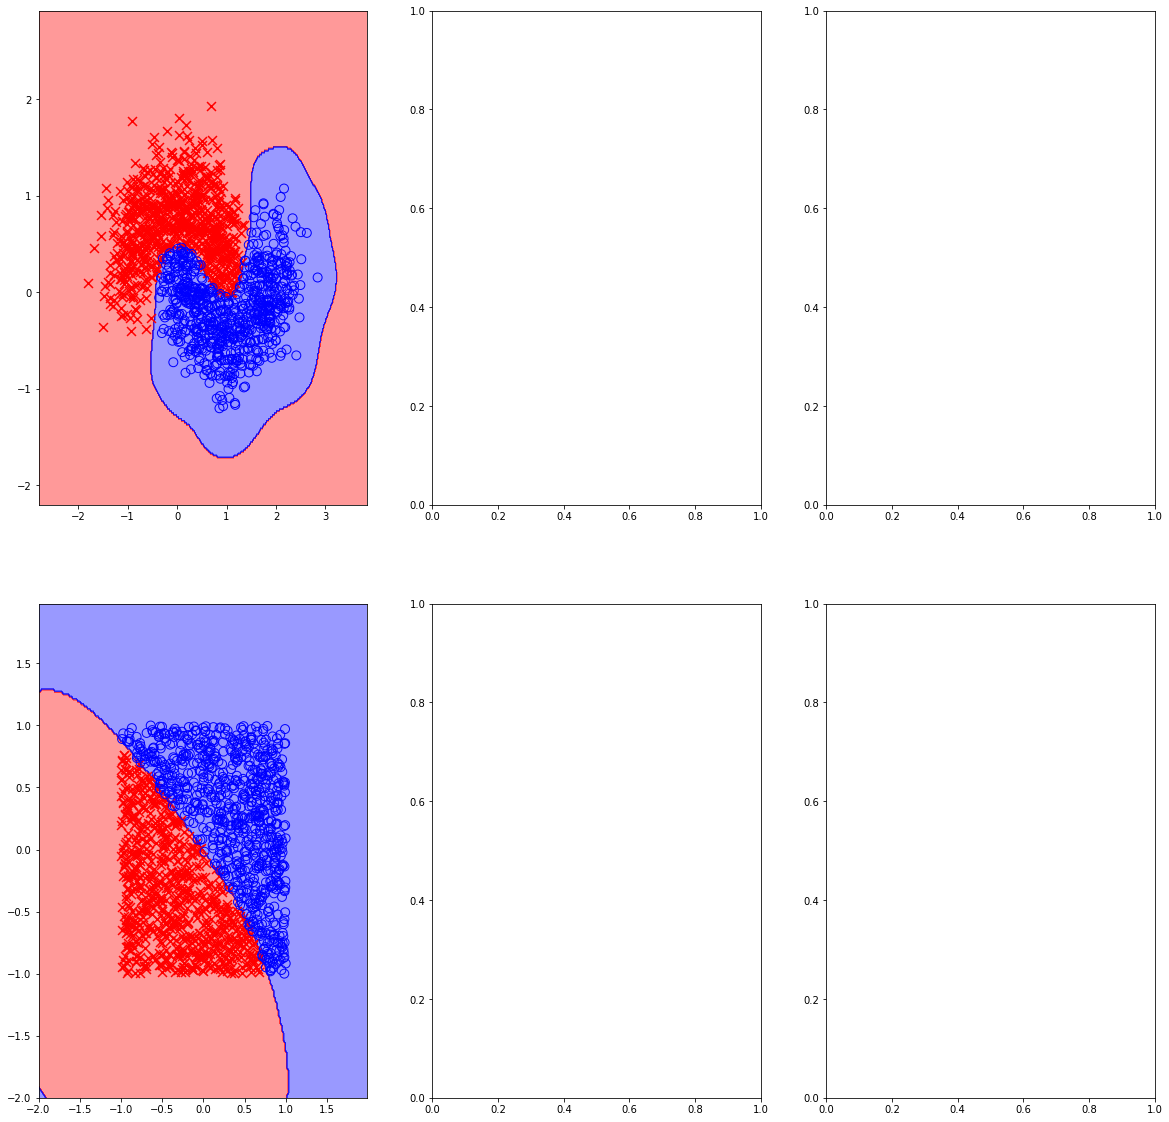

In [114]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

from matplotlib.colors import ListedColormap
def plot_decision_surface(model,X_train, Y_train, axes):
    y_pred_train = model.predict(X_train)
    
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    
    x_min, x_max = X_train[:,0].min()-1, X_train[:,0].max()+1
    y_min, y_max = X_train[:,1].min()-1, X_train[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)
    
    axes.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    axes.scatter(X_train[y_pred_train==0,0], X_train[y_pred_train==0,1],
                alpha=1, s=80,color='r', marker='x')
    
    axes.scatter(X_train[y_pred_train==1,0], X_train[y_pred_train==1,1],
                alpha=1, s=80, color='b', marker='o', facecolor='none', edgecolor='b')
    
    
    


datasets = ['dataset_A.npz', 'dataset_B.npz']
fig = plt.subplots(nrows=2, ncols=3,figsize=(20,20))

# plot for rbf
plots_pos = np.array([231,234])
C, gamma = [0.1, 0.1], [10.0, 1.0]
for i in range(len(datasets)):
    data = np.load('Archive2/' + datasets[i])
    X_train = data['arr_0.npy']
    Y_train = data['arr_1.npy']

    X_test  = data['arr_2.npy']
    Y_test  = data['arr_3.npy']
    
    svc_clf = SVC(C=C[i], kernel='rbf', gamma=gamma[i])
    svc_clf.fit(X_train, Y_train)
    
    y_pred_train = svc_clf.predict(X_train)
    y_pred_test = svc_clf.predict(X_test)
    train_accuracy = np.count_nonzero(y_pred_train == Y_train)/Y_train.shape[0]
    test_accuracy =  np.count_nonzero(y_pred_test == Y_test)/Y_test.shape[0]
    
#     axes = plt.subplot(plots_pos[i])
#     plot_decision_surface(svc_clf,X_train, Y_train, axes)
    
    
    
    


# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. (use a part of training set as validation set) 

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [ ]:
# CodeWrite cell
# Write Decision tree classifier from scratch, write code for choosing best node size to stop splitting.
# write only functions here




In [ ]:
# CodeWrite cell
# Write code here for generating the numbers that you report below.



TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  



In [ ]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 



# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features taken per data=0.5).  Choose the number of trees to add in the forest by using a validation set. (You may use sklearn decision tree function, if you want)

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the via using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [ ]:
# CodeWrite cell
# Write Random Forest classifier assuming access to a decision tree learner, 
# write code for choosing best node size to stop splitting.
# write only functions here




In [ ]:
# CodeWrite cell
# Write code here for generating the numbers that you report below.



TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  


In [ ]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 
